# Leding Club default analysis

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import matplotlib.patches as mpatches

import plotly
import plotly.plotly as py

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics

import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode

import datetime as dt
import numpy as np

In [2]:
loan = pd.read_csv('loan.csv', low_memory=False)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### I only explore 7 columns: loan amount, term, int rate, grade, issue date, loan status, address state on my first step


In [3]:
corrmat = loan.corr()
corrmat

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,1.000000,0.999443,0.063803,0.066058,0.071502,-0.142963,0.025347,0.033990,0.067781,0.049648,...,0.009510,0.009703,0.011797,0.004960,-0.000543,0.000428,0.048724,-0.013579,-0.000914,0.014084
member_id,0.999443,1.000000,0.064461,0.066754,0.072308,-0.142205,0.026036,0.034146,0.067824,0.049904,...,0.005955,0.009033,0.006729,0.003529,-0.003295,0.000492,0.048660,-0.013022,-0.005038,0.012763
loan_amnt,0.063803,0.064461,1.000000,0.999263,0.997115,0.145023,0.944977,0.332698,0.020675,-0.000159,...,0.135564,-0.107249,-0.051313,-0.028005,0.412165,0.019173,0.312439,0.009638,0.071500,0.007928
funded_amnt,0.066058,0.066754,0.999263,1.000000,0.998025,0.145160,0.946005,0.332466,0.021075,0.000151,...,0.135564,-0.107249,-0.051313,-0.028005,0.412165,0.019173,0.312439,0.009638,0.071500,0.007928
funded_amnt_inv,0.071502,0.072308,0.997115,0.998025,1.000000,0.145205,0.943632,0.331420,0.022185,0.000648,...,0.135529,-0.107337,-0.051439,-0.028118,0.412268,0.018969,0.312473,0.009548,0.071515,0.007820
int_rate,-0.142963,-0.142205,0.145023,0.145160,0.145205,1.000000,0.133075,-0.072786,0.079903,0.055178,...,0.053045,0.183565,0.176683,0.171105,-0.104402,0.288049,-0.166119,0.171162,0.020711,0.252637
installment,0.025347,0.026036,0.944977,0.946005,0.943632,0.133075,1.000000,0.326182,0.014333,0.007876,...,0.116193,-0.102522,-0.022923,-0.004324,0.385694,0.025131,0.286829,0.015213,0.056176,0.029699
annual_inc,0.033990,0.034146,0.332698,0.332466,0.331420,-0.072786,0.326182,1.000000,-0.087410,0.047470,...,0.215808,-0.050157,-0.006532,-0.011844,0.323838,0.009813,0.268860,0.063758,0.052432,0.079720
dti,0.067781,0.067824,0.020675,0.021075,0.022185,0.079903,0.014333,-0.087410,1.000000,-0.002831,...,0.028134,-0.004285,-0.003016,-0.001053,0.010856,0.034614,0.032941,0.011065,0.011851,0.003552
delinq_2yrs,0.049648,0.049904,-0.000159,0.000151,0.000648,0.055178,0.007876,0.047470,-0.002831,1.000000,...,0.061545,-0.012308,-0.025960,-0.054318,-0.063617,0.003157,-0.041070,0.040830,0.014746,0.034490


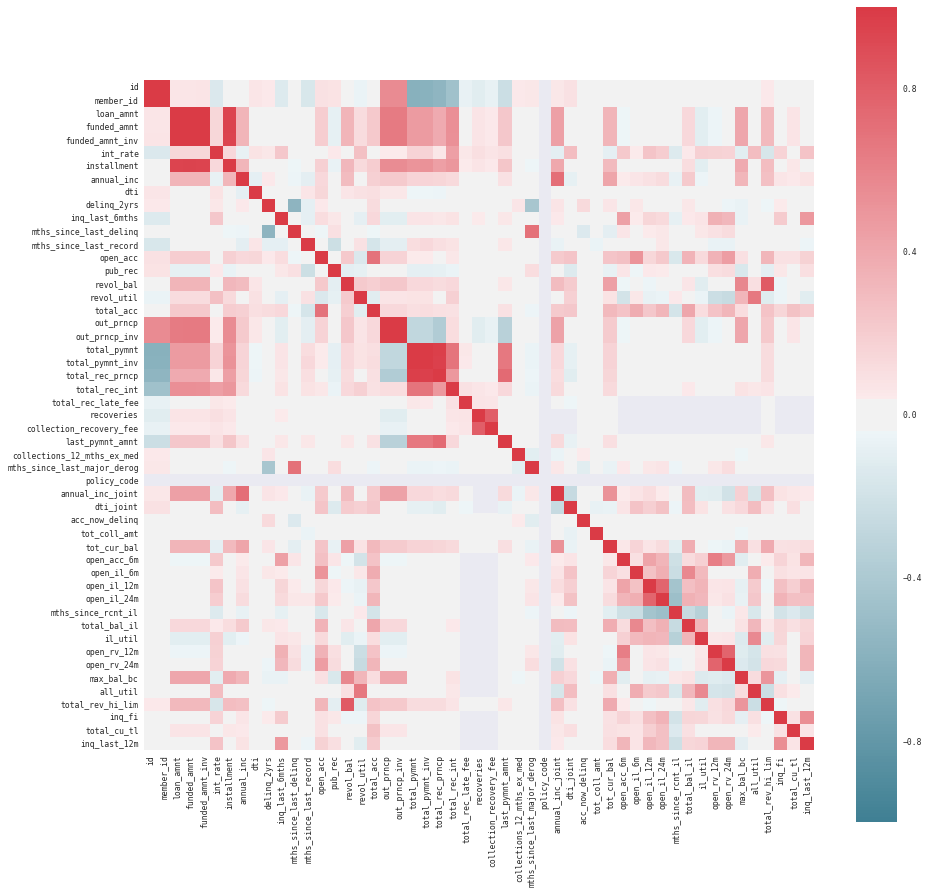

In [4]:
import seaborn as sns
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, mask=np.zeros_like(corrmat, dtype=np.bool),\
            cmap=sns.diverging_palette(220, 10, as_cmap=True),\
            square=True, ax=ax)

In [5]:
loan00 = loan.iloc[:,[2,5,6,8,15,16,23]]
loan00

,loan_amnt,term,int_rate,grade,issue_d,loan_status,addr_state
0,5000.0,36 months,10.65,B,Dec-2011,Fully Paid,AZ
1,2500.0,60 months,15.27,C,Dec-2011,Charged Off,GA
2,2400.0,36 months,15.96,C,Dec-2011,Fully Paid,IL
3,10000.0,36 months,13.49,C,Dec-2011,Fully Paid,CA
4,3000.0,60 months,12.69,B,Dec-2011,Current,OR
5,5000.0,36 months,7.90,A,Dec-2011,Fully Paid,AZ
6,7000.0,60 months,15.96,C,Dec-2011,Current,NC
7,3000.0,36 months,18.64,E,Dec-2011,Fully Paid,CA
8,5600.0,60 months,21.28,F,Dec-2011,Charged Off,CA
9,5375.0,60 months,12.69,B,Dec-2011,Charged Off,TX


In [6]:
loan00.dtypes

loan_amnt      float64
term            object
int_rate       float64
grade           object
issue_d         object
loan_status     object
addr_state      object
dtype: object

### The issue_d is not datetime type. So I convert it from string to datetime.

In [7]:
loan00['issue_d2']=pd.to_datetime(loan00['issue_d'])

/Users/weiji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [8]:
print (loan00.dtypes)
loan00.head()

loan_amnt             float64
term                   object
int_rate              float64
grade                  object
issue_d                object
loan_status            object
addr_state             object
issue_d2       datetime64[ns]
dtype: object


,loan_amnt,term,int_rate,grade,issue_d,loan_status,addr_state,issue_d2
0,5000.0,36 months,10.65,B,Dec-2011,Fully Paid,AZ,2011-12-01
1,2500.0,60 months,15.27,C,Dec-2011,Charged Off,GA,2011-12-01
2,2400.0,36 months,15.96,C,Dec-2011,Fully Paid,IL,2011-12-01
3,10000.0,36 months,13.49,C,Dec-2011,Fully Paid,CA,2011-12-01
4,3000.0,60 months,12.69,B,Dec-2011,Current,OR,2011-12-01


## Here are some over-all EDA

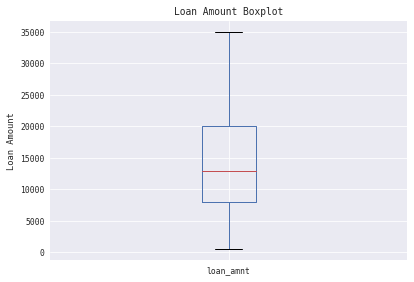

In [9]:
# Boxplot it.
loan00['loan_amnt'].plot.box()
plt.title('Loan Amount Boxplot')
plt.ylabel('Loan Amount')
plt.xlabel('')

(-0.5, 399.5, 199.5, -0.5)

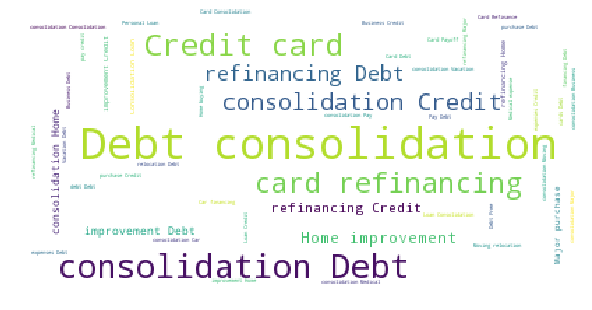

In [10]:
#Wordcloud will be nice!
from os import path
from wordcloud import WordCloud
plt.figure(figsize=(10,7))
text = loan['title'].to_json()
wc = WordCloud(ranks_only=True,prefer_horizontal = 0.6,background_color = 'white',
              max_words = 50).generate(text)
plt.imshow(wc)
plt.axis("off")

### I select the month of the date, and calculate sum amount during each month. 

In [11]:
loan01 = loan00.groupby(['issue_d2']).sum()
loan01=loan01.reset_index()
loan01['Issue_d']=[loan01.to_period('M')for 
                   loan01 in loan01['issue_d2']] #select month of date
loan01=loan01.drop(['issue_d2','int_rate'], axis=1)
loan01=loan01.groupby(['Issue_d']).sum()
loan01['loan_amnt']=loan01['loan_amnt']/1000

In [12]:
loan01.head(10)

,loan_amnt
Issue_d,
2007-06,91.850
2007-07,348.325
2007-08,515.300
2007-09,372.950
2007-10,753.225
2007-11,1008.650
2007-12,1887.175
2008-01,2926.000
2008-02,2959.225


### Use a graph to show the loan amount trend from 2007 to 2016

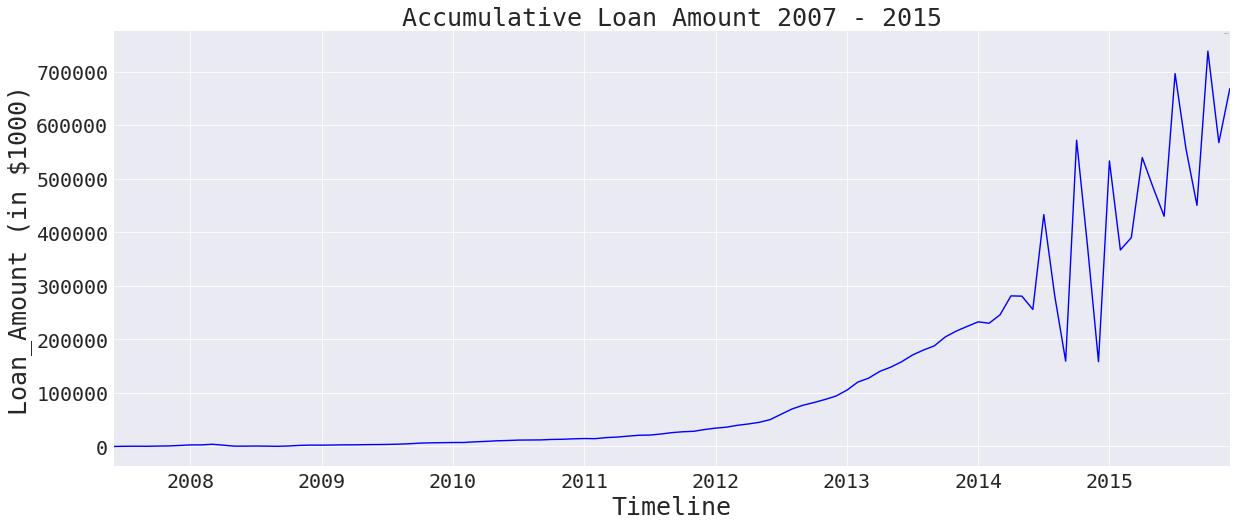

In [13]:
pic1 = loan01.plot(figsize=(20,8), fontsize=20,color='b')
plt.legend(loc='best',fontsize=0)
pic1.set_xlabel('Timeline', fontsize=25)
pic1.set_ylabel('Loan_Amount (in $1000)',fontsize=25)
pic1.set_title('Accumulative Loan Amount 2007 - 2015',fontsize=25)

#### The curve starts to fluctuate since 2014, so let's take a closer look to the moving cycle.

In [14]:
loan01_2=loan01.tail(24)
loan01_2

,loan_amnt
Issue_d,
2014-01,232715.325
2014-02,230086.925
2014-03,245762.800
2014-04,281179.575
2014-05,280661.600
2014-06,255898.875
2014-07,433044.725
2014-08,281426.975
2014-09,159444.175


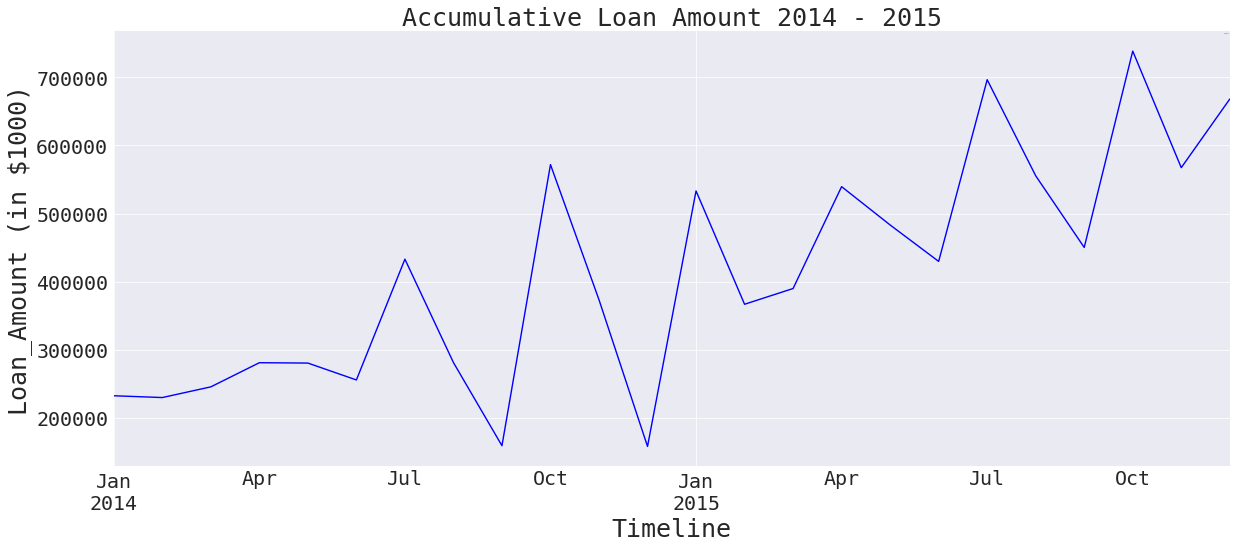

In [15]:
pic1 = loan01_2.plot(figsize=(20,8), fontsize=20,color='b')
plt.legend(loc='best',fontsize=0)
pic1.set_xlabel('Timeline', fontsize=25)
pic1.set_ylabel('Loan_Amount (in $1000)',fontsize=25)
pic1.set_title('Accumulative Loan Amount 2014 - 2015',fontsize=25)

### I also wanted to see the loan amount in different states

In [16]:
loan02=loan00.iloc[:,[0,-2]]
loan02_1=loan02.groupby(['addr_state']).sum()
loan02_2=loan02_1.reset_index()
loan02_2['loan_amnt(mil.)']=loan02_2['loan_amnt']/1000000
loan02_2=loan02_2.drop(['loan_amnt'],axis=1)
loan02_2

,addr_state,loan_amnt(mil.)
0,AK,36.978050
1,AL,164.627650
2,AR,93.416075
3,AZ,290.110100
4,CA,1898.145250
5,CO,281.093375
6,CT,202.956750
7,DC,36.888475
8,DE,36.916100
9,FL,848.989075


In [17]:
#draw a color map of sum of loan in different states 

scale = [[0, 'rgb(229, 239, 245)'],[1, 'rgb(1, 97, 156)']]

[[0.0, 'rgb(223,221,228)'], [0.2, 'rgb(199,199,216)'], [0.4, 'rgb(169,170,201)'],[0.6, 'rgb(139,135,181)'], [0.8, 'rgb(98,88,158)'], [1.0, 'rgb(63,20,122)']]





data  = [dict(type='choropleth', colorscale=scale,
              autocolorscale = False,
              showscale = False, 
              locations=loan02_2['addr_state'],
              z=loan02_2['loan_amnt(mil.)'].astype(float),
              locationmode = 'USA-states',
              #text=loan02_2['text'], hoverinfo='location+z',
              marker= dict(line=dict(color='rgb(255,255,255)', width=2)),
              )]

layout = dict(title='Lending Club Loan Volumn Reginal Outlook <br />(Sum of Personal Loan Amount in Million)',
              geo = dict(scope='USA', projection=dict(type='albers usa'),
                         showlakes=True,
                        lakecolor='rgb(95,145,237)'))

fig = dict(data=data, layout=layout)

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot(fig)
# plotly.offline.plot(fig)

### I also wanted to explore the relationship between interests rate of different grades and terms.


In [18]:
loan03=loan00.iloc[:,[1,2,3]]

In [19]:
loan03_1 = loan03.groupby(['grade','term']).mean()
loan03_1 = loan03_1.reset_index()
#Reorganize the data using pivot command
loan03_2 = loan03_1.pivot(index='grade', columns='term',values='int_rate')
loan03_2

term,36 months,60 months
grade,,
A,7.215919,7.998581
B,10.864500,10.655718
C,13.921937,14.093312
D,17.163474,17.190871
E,19.764985,19.956477
F,23.325132,23.644718
G,23.982595,25.861530


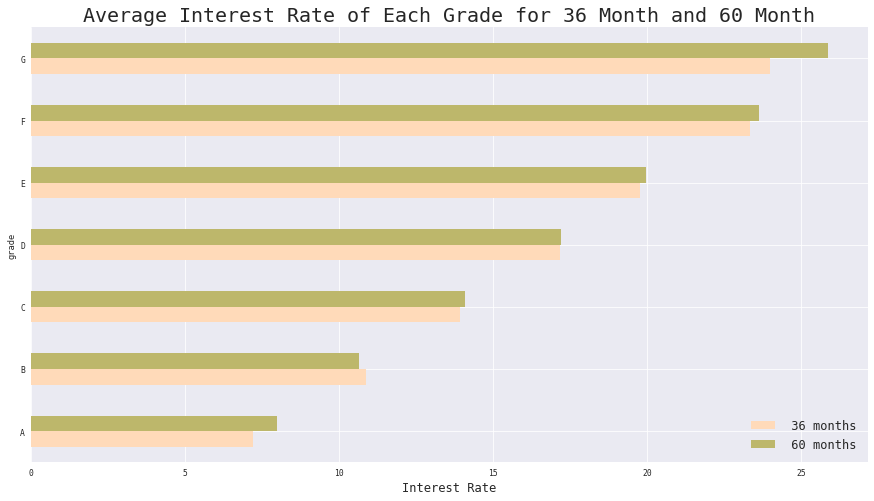

In [20]:
#Draw a horizental bar chart to compare rates of different conditions
pic2=loan03_2.plot(kind='barh',figsize=(15,8),color=['peachpuff','darkkhaki'])
pic2.legend(loc='lower right',fontsize=12)
pic2.set_title('Average Interest Rate of Each Grade for 36 Month and 60 Month',fontsize=20)
pic2.set_xlabel('Interest Rate',fontsize=12)

### I also wanted to see the content of ten different loan status:

In [21]:
loan04=loan00.iloc[:,[-1,-3]]
loan04.describe().transpose()

,count,unique,top,freq,first,last
issue_d2,887379,103,2015-10-01 00:00:00,48631,2007-06-01 00:00:00,2015-12-01 00:00:00
loan_status,887379,10,Current,601779,NaN,NaN


In [22]:
loan04.head()

,issue_d2,loan_status
0,2011-12-01,Fully Paid
1,2011-12-01,Charged Off
2,2011-12-01,Fully Paid
3,2011-12-01,Fully Paid
4,2011-12-01,Current


In [23]:
pd.crosstab(index=loan04['loan_status'], columns='count')

col_0,count
loan_status,
Charged Off,45248
Current,601779
Default,1219
Does not meet the credit policy. Status:Charged Off,761
Does not meet the credit policy. Status:Fully Paid,1988
Fully Paid,207723
In Grace Period,6253
Issued,8460
Late (16-30 days),2357


In [24]:
loan04['issue_y']=loan04['issue_d2'].apply(lambda x: x.year)
loan04=loan04.drop(['issue_d2'],axis=1)
loan04.head()

/Users/weiji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,loan_status,issue_y
0,Fully Paid,2011
1,Charged Off,2011
2,Fully Paid,2011
3,Fully Paid,2011
4,Current,2011


In [25]:
loan04['count']=1
loan04_2=loan04.groupby(['issue_y','loan_status']).sum()

In [26]:
loan04_2=loan04_2.unstack(level=1).fillna(0)
loan04_2.head()

count                  \
loan_status Charged Off Current Default   
issue_y                                   
2007               45.0     0.0     0.0   
2008              247.0     0.0     0.0   
2009              594.0     0.0     0.0   
2010             1483.0     7.0     1.0   
2011             3205.0  1953.0     8.0   

                                                                 \
loan_status Does not meet the credit policy. Status:Charged Off   
issue_y                                                           
2007                                                     113.0    
2008                                                     249.0    
2009                                                     129.0    
2010                                                     270.0    
2011                                                       0.0    

                                                                           \
loan_status Does not meet the credit policy. Status:Fully Paid Fully Paid   
issue_y                                                                     
2007                                                     239.0      206.0   
2008                                                     582.0     1315.0   
2009                                                     436.0     4122.0   
2010                                                     731.0    10038.0   
2011                                                       0.0    16470.0   

                                                                         
loan_status In Grace Period Issued Late (16-30 days) Late (31-120 days)  
issue_y                                                                  
2007                    0.0    0.0               0.0                0.0  
2008                    0.0    0.0               0.0                0.0  
2009                    0.0    0.0               0.0                0.0  
2010                    0.0    0.0               2.0                5.0  
2011                   28.0    0.0              11.0               46.0

In [27]:
loan04_3=loan04_2
loan04_3.describe().transpose().iloc[:,0]

       loan_status                                        
count  Charged Off                                            9.0
       Current                                                9.0
       Default                                                9.0
       Does not meet the credit policy. Status:Charged Off    9.0
       Does not meet the credit policy. Status:Fully Paid     9.0
       Fully Paid                                             9.0
       In Grace Period                                        9.0
       Issued                                                 9.0
       Late (16-30 days)                                      9.0
       Late (31-120 days)                                     9.0
Name: count, dtype: float64

In [28]:
defualts_cols = ['Charged Off',
        'Default',
        'Does not meet the credit policy. Status:Charged Off',
        'Late (16-30 days)','Late (31-120 days)']
loan04_3.columns = loan04_3.columns.droplevel(0) #drop the first level of columns

In [29]:
loan04_3['total loan record']=np.sum(loan04_3, axis=1)
    

In [30]:
loan04_3['total default record']=np.sum(loan04_3[defualts_cols], axis=1)


In [31]:
loan04_3

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days),total loan record,total default record
issue_y,,,,,,,,,,,,
2007,45.0,0.0,0.0,113.0,239.0,206.0,0.0,0.0,0.0,0.0,603.0,158.0
2008,247.0,0.0,0.0,249.0,582.0,1315.0,0.0,0.0,0.0,0.0,2393.0,496.0
2009,594.0,0.0,0.0,129.0,436.0,4122.0,0.0,0.0,0.0,0.0,5281.0,723.0
2010,1483.0,7.0,1.0,270.0,731.0,10038.0,0.0,0.0,2.0,5.0,12537.0,1761.0
2011,3205.0,1953.0,8.0,0.0,0.0,16470.0,28.0,0.0,11.0,46.0,21721.0,3270.0
2012,8084.0,3444.0,28.0,0.0,0.0,41479.0,83.0,0.0,27.0,222.0,53367.0,8361.0
2013,14836.0,60264.0,182.0,0.0,0.0,56396.0,977.0,0.0,320.0,1780.0,134755.0,17118.0
2014,13981.0,158558.0,613.0,0.0,0.0,54713.0,2058.0,0.0,858.0,4847.0,235628.0,20299.0
2015,2773.0,377553.0,387.0,0.0,0.0,22984.0,3107.0,8460.0,1139.0,4691.0,421094.0,8990.0


In [32]:
loan04_3['default rate']=round(loan04_3
                               ['total default record']
                               /loan04_3['total loan record'],4)

In [33]:
loan04_4=loan04_3.iloc[:,[-3,-2]]

In [34]:
loan04_4

loan_status,total loan record,total default record
issue_y,,
2007,603.0,158.0
2008,2393.0,496.0
2009,5281.0,723.0
2010,12537.0,1761.0
2011,21721.0,3270.0
2012,53367.0,8361.0
2013,134755.0,17118.0
2014,235628.0,20299.0
2015,421094.0,8990.0


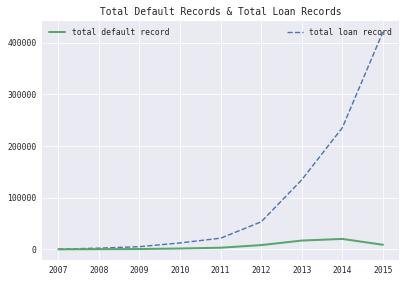

In [35]:
#draw a line chart to show the trend of loan records and defult loan records:

line1, = plt.plot(loan04_4['total loan record'], label="total loan record", linestyle='--')
line2, = plt.plot(loan04_4['total default record'], label="total default record", linewidth=2)
legend1 = plt.legend(handles=[line1], loc=1)
ax = plt.gca().add_artist(legend1)
plt.legend(handles=[line2], loc=2)
plt.ticklabel_format(useOffset=False)
plt.title('Total Default Records & Total Loan Records')
plt.show()

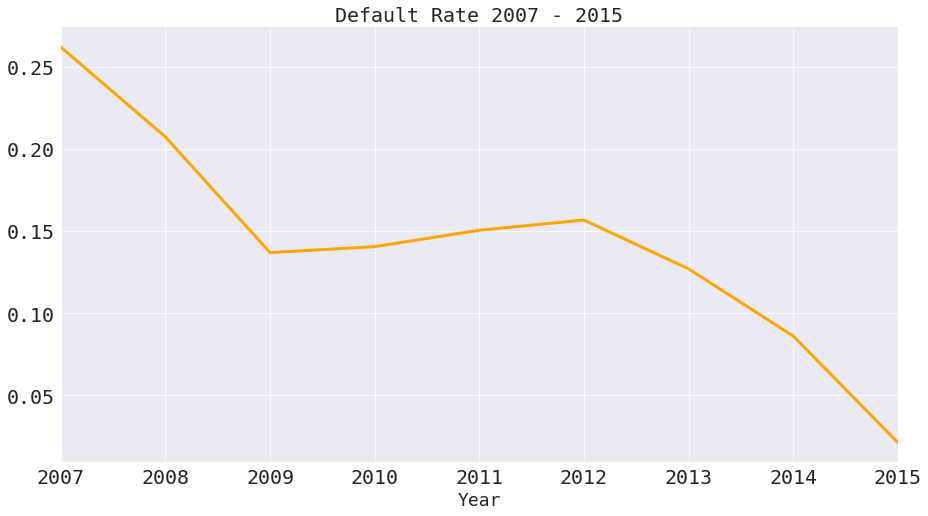

In [36]:
#Slice the rate part:
loan04_5=loan04_3.iloc[:,[-1]]
#Draw a grapg to learn the trend of default rate from 2007 to 2015
pic4=loan04_5.plot(figsize=(15,8), fontsize=20, color='orange',lw=3, legend=False)
pic4.set_title('Default Rate 2007 - 2015', fontsize=20)
pic4.set_xlabel('Year', fontsize=18)
plt.ticklabel_format(useOffset=False)

### Let's explore the grade and the default rate

In [37]:
loan05=loan00.iloc[:,[3,5]]
loan05['count']=1
loan05.head(10)

/Users/weiji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,grade,loan_status,count
0,B,Fully Paid,1
1,C,Charged Off,1
2,C,Fully Paid,1
3,C,Fully Paid,1
4,B,Current,1
5,A,Fully Paid,1
6,C,Current,1
7,E,Fully Paid,1
8,F,Charged Off,1
9,B,Charged Off,1


In [38]:
loan05_1=loan05.groupby(['grade','loan_status']).sum()
loan05_2=loan05_1.unstack(level=1)
loan05_2

count                  \
loan_status Charged Off Current Default   
grade                                     
A                  2617  103322      47   
B                  9519  171735     198   
C                 12642  171175     360   
D                 10486   91984     312   
E                  6258   47061     201   
F                  2934   13589      79   
G                   792    2913      22   

                                                                 \
loan_status Does not meet the credit policy. Status:Charged Off   
grade                                                             
A                                                            8    
B                                                           85    
C                                                          148    
D                                                          197    
E                                                          158    
F                                                           93    
G                                                           72    

                                                                           \
loan_status Does not meet the credit policy. Status:Fully Paid Fully Paid   
grade                                                                       
A                                                           90      39679   
B                                                          269      66546   
C                                                          481      52678   
D                                                          494      30020   
E                                                          378      12928   
F                                                          154       4726   
G                                                          122       1146   

                                                                         
loan_status In Grace Period Issued Late (16-30 days) Late (31-120 days)  
grade                                                                    
A                       365   1448               134                492  
B                      1240   2529               410               2004  
C                      1887   2472               678               3339  
D                      1405   1185               569               2890  
E                       908    593               368               1852  
F                       354    194               155                768  
G                        94     39                43                246

In [39]:
loan05_2.columns = loan05_2.columns.droplevel(0)

In [40]:
loan05_3=loan05_2
loan05_3['total default record']=np.sum(loan05_3[defualts_cols], axis=1)
loan05_3['total loan record']=np.sum(loan05_3, axis=1)
loan05_3

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days),total default record,total loan record
grade,,,,,,,,,,,,
A,2617,103322,47,8,90,39679,365,1448,134,492,3298,151500
B,9519,171735,198,85,269,66546,1240,2529,410,2004,12216,266751
C,12642,171175,360,148,481,52678,1887,2472,678,3339,17167,263027
D,10486,91984,312,197,494,30020,1405,1185,569,2890,14454,153996
E,6258,47061,201,158,378,12928,908,593,368,1852,8837,79542
F,2934,13589,79,93,154,4726,354,194,155,768,4029,27075
G,792,2913,22,72,122,1146,94,39,43,246,1175,6664


In [41]:
loan05_3['default rate']=round(loan05_3
                               ['total default record']
                               /loan05_3['total loan record'],4)
loan05_3

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days),total default record,total loan record,default rate
grade,,,,,,,,,,,,,
A,2617,103322,47,8,90,39679,365,1448,134,492,3298,151500,0.0218
B,9519,171735,198,85,269,66546,1240,2529,410,2004,12216,266751,0.0458
C,12642,171175,360,148,481,52678,1887,2472,678,3339,17167,263027,0.0653
D,10486,91984,312,197,494,30020,1405,1185,569,2890,14454,153996,0.0939
E,6258,47061,201,158,378,12928,908,593,368,1852,8837,79542,0.1111
F,2934,13589,79,93,154,4726,354,194,155,768,4029,27075,0.1488
G,792,2913,22,72,122,1146,94,39,43,246,1175,6664,0.1763


In [42]:
loan05_4=loan05_3.iloc[:,[-1]]
loan05_4

loan_status,default rate
grade,
A,0.0218
B,0.0458
C,0.0653
D,0.0939
E,0.1111
F,0.1488
G,0.1763


In [43]:
loan05_5=loan05_4.reset_index()
loan05_5

loan_status,grade,default rate
0,A,0.0218
1,B,0.0458
2,C,0.0653
3,D,0.0939
4,E,0.1111
5,F,0.1488
6,G,0.1763


In [44]:
loan_merge=loan03_2.reset_index()
loan05_6=pd.merge(loan_merge,loan05_5, how='inner', on=['grade'])
loan05_6

,grade,36 months,60 months,default rate
0,A,7.215919,7.998581,0.0218
1,B,10.864500,10.655718,0.0458
2,C,13.921937,14.093312,0.0653
3,D,17.163474,17.190871,0.0939
4,E,19.764985,19.956477,0.1111
5,F,23.325132,23.644718,0.1488
6,G,23.982595,25.861530,0.1763


In [45]:
loan05_7=loan05_6.iloc[:,[0,1,-1]]
loan05_7['default rate']=loan05_7.iloc[:,[-1]]*100
loan05_7=loan05_7.iloc[:,[0,1,-1]]
loan05_7['interest rate']=round((loan05_7.iloc[:,[1]]),2)
loan05_7=loan05_7.iloc[:,[0,-2,-1]]
loan05_7=loan05_7.set_index(['grade'])
loan05_7

/Users/weiji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,default rate,interest rate
grade,,
A,2.18,7.22
B,4.58,10.86
C,6.53,13.92
D,9.39,17.16
E,11.11,19.76
F,14.88,23.33
G,17.63,23.98


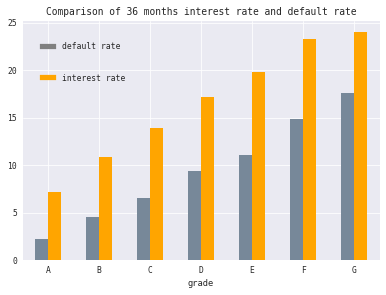

In [46]:
fig,ax=plt.subplots()
loan05_7.plot(kind='bar', ax=ax, rot=0, color=['lightslategrey','orange'], 
              title='Comparison of 36 months interest rate and default rate', legend=False)

orange_patch = mpatches.Patch(color='orange', label='interest rate')
legend1=plt.legend(handles=[orange_patch], loc=(0.04,0.73))
ax = plt.gca().add_artist(legend1)
grey_patch = mpatches.Patch(color='grey', label='default rate')
plt.legend(handles=[grey_patch],loc=(0.04,0.86))

In [47]:
good_loan =  len(loan00[(loan00.loan_status == 'Fully Paid') |
                    (loan00.loan_status == 'Current') | 
                    (loan00.loan_status == 'Does not meet the credit policy. Status:Fully Paid')])
print ('Good/Bad Loan Ratio: %.2f%%'  % (good_loan/len(loan00)*100))

Good/Bad Loan Ratio: 91.45%


# Now let's build a model to predict the default.

In [48]:
#Pick attributes
loan06 = loan.iloc[:,[1,2,5,6,7,8,12,13,14,16,24,27,30,32,33,34]]
loan06.head()

,member_id,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc
0,1296599,5000.0,36 months,10.65,162.87,B,RENT,24000.0,Verified,Fully Paid,27.65,1.0,3.0,13648.0,83.7,9.0
1,1314167,2500.0,60 months,15.27,59.83,C,RENT,30000.0,Source Verified,Charged Off,1.00,5.0,3.0,1687.0,9.4,4.0
2,1313524,2400.0,36 months,15.96,84.33,C,RENT,12252.0,Not Verified,Fully Paid,8.72,2.0,2.0,2956.0,98.5,10.0
3,1277178,10000.0,36 months,13.49,339.31,C,RENT,49200.0,Source Verified,Fully Paid,20.00,1.0,10.0,5598.0,21.0,37.0
4,1311748,3000.0,60 months,12.69,67.79,B,RENT,80000.0,Source Verified,Current,17.94,0.0,15.0,27783.0,53.9,38.0


In [49]:
#Check attributes types
print(loan06.dtypes)
al_cols = loan06.columns
loan06.head()

member_id                int64
loan_amnt              float64
term                    object
int_rate               float64
installment            float64
grade                   object
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
dti                    float64
inq_last_6mths         float64
open_acc               float64
revol_bal              float64
revol_util             float64
total_acc              float64
dtype: object


,member_id,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc
0,1296599,5000.0,36 months,10.65,162.87,B,RENT,24000.0,Verified,Fully Paid,27.65,1.0,3.0,13648.0,83.7,9.0
1,1314167,2500.0,60 months,15.27,59.83,C,RENT,30000.0,Source Verified,Charged Off,1.00,5.0,3.0,1687.0,9.4,4.0
2,1313524,2400.0,36 months,15.96,84.33,C,RENT,12252.0,Not Verified,Fully Paid,8.72,2.0,2.0,2956.0,98.5,10.0
3,1277178,10000.0,36 months,13.49,339.31,C,RENT,49200.0,Source Verified,Fully Paid,20.00,1.0,10.0,5598.0,21.0,37.0
4,1311748,3000.0,60 months,12.69,67.79,B,RENT,80000.0,Source Verified,Current,17.94,0.0,15.0,27783.0,53.9,38.0


## Some attributes are not numeric.  I have to do some feature engineering to remodel them. I use get_dummies and map method to transform those attributes into something that the computer can understand.

In [50]:
print(loan06.term.value_counts())
print(loan06.grade.value_counts())
print(loan06.home_ownership.value_counts())
print(loan06.verification_status.value_counts())
print(loan06.loan_status.value_counts())

 36 months    621125
 60 months    266254
Name: term, dtype: int64
B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64
MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64
Source Verified    329558
Verified           291071
Not Verified       266750
Name: verification_status, dtype: int64
Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  121

In [51]:
# Transform the credit grade
loan07 = loan06
grade1 =  {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' :7}
loan07['grade1'] = loan07['grade'].map(grade1)

/Users/weiji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [52]:
#Transform the home ownership type
home_df = pd.get_dummies(loan06.home_ownership, prefix = 'home')
loan07 = loan07.join(home_df)

In [53]:
#Transform the term length
term_df = pd.get_dummies(loan06.term, prefix = 'term')
loan07 = loan07.join(term_df)

In [54]:
loan07

,member_id,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,...,total_acc,grade1,home_ANY,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT,term_ 36 months,term_ 60 months
0,1296599,5000.0,36 months,10.65,162.87,B,RENT,24000.00,Verified,Fully Paid,...,9.0,2,0,0,0,0,0,1,1,0
1,1314167,2500.0,60 months,15.27,59.83,C,RENT,30000.00,Source Verified,Charged Off,...,4.0,3,0,0,0,0,0,1,0,1
2,1313524,2400.0,36 months,15.96,84.33,C,RENT,12252.00,Not Verified,Fully Paid,...,10.0,3,0,0,0,0,0,1,1,0
3,1277178,10000.0,36 months,13.49,339.31,C,RENT,49200.00,Source Verified,Fully Paid,...,37.0,3,0,0,0,0,0,1,1,0
4,1311748,3000.0,60 months,12.69,67.79,B,RENT,80000.00,Source Verified,Current,...,38.0,2,0,0,0,0,0,1,0,1
5,1311441,5000.0,36 months,7.90,156.46,A,RENT,36000.00,Source Verified,Fully Paid,...,12.0,1,0,0,0,0,0,1,1,0
6,1304742,7000.0,60 months,15.96,170.08,C,RENT,47004.00,Not Verified,Current,...,11.0,3,0,0,0,0,0,1,0,1
7,1288686,3000.0,36 months,18.64,109.43,E,RENT,48000.00,Source Verified,Fully Paid,...,4.0,5,0,0,0,0,0,1,1,0
8,1306957,5600.0,60 months,21.28,152.39,F,OWN,40000.00,Source Verified,Charged Off,...,13.0,6,0,0,0,0,1,0,0,1
9,1306721,5375.0,60 months,12.69,121.45,B,RENT,15000.00,Verified,Charged Off,...,3.0,2,0,0,0,0,0,1,0,1


In [55]:
#Transform the verification status into binary
veri =  {'Source Verified' : 1, 'Verified' : 1, 'Not Verified' : 0}
loan07['v_status'] = loan07['verification_status'].map(veri)
loan07

,member_id,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,...,grade1,home_ANY,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT,term_ 36 months,term_ 60 months,v_status
0,1296599,5000.0,36 months,10.65,162.87,B,RENT,24000.00,Verified,Fully Paid,...,2,0,0,0,0,0,1,1,0,1
1,1314167,2500.0,60 months,15.27,59.83,C,RENT,30000.00,Source Verified,Charged Off,...,3,0,0,0,0,0,1,0,1,1
2,1313524,2400.0,36 months,15.96,84.33,C,RENT,12252.00,Not Verified,Fully Paid,...,3,0,0,0,0,0,1,1,0,0
3,1277178,10000.0,36 months,13.49,339.31,C,RENT,49200.00,Source Verified,Fully Paid,...,3,0,0,0,0,0,1,1,0,1
4,1311748,3000.0,60 months,12.69,67.79,B,RENT,80000.00,Source Verified,Current,...,2,0,0,0,0,0,1,0,1,1
5,1311441,5000.0,36 months,7.90,156.46,A,RENT,36000.00,Source Verified,Fully Paid,...,1,0,0,0,0,0,1,1,0,1
6,1304742,7000.0,60 months,15.96,170.08,C,RENT,47004.00,Not Verified,Current,...,3,0,0,0,0,0,1,0,1,0
7,1288686,3000.0,36 months,18.64,109.43,E,RENT,48000.00,Source Verified,Fully Paid,...,5,0,0,0,0,0,1,1,0,1
8,1306957,5600.0,60 months,21.28,152.39,F,OWN,40000.00,Source Verified,Charged Off,...,6,0,0,0,0,1,0,0,1,1
9,1306721,5375.0,60 months,12.69,121.45,B,RENT,15000.00,Verified,Charged Off,...,2,0,0,0,0,0,1,0,1,1


In [56]:
#Transform the loan_status into binary. 1 means default and 0 means not default.
stat =  {'Charged Off' : 1,
        'Default' : 1,
        'Does not meet the credit policy. Status:Charged Off' : 1,
        'Late (16-30 days)' :1,
        'Late (31-120 days)' : 1,\
        'Current' : 0,
        'Fully Paid' : 0,
        'Issued' : 0,
        'In Grace Period' : 0,
        'Does not meet the credit policy. Status:Fully Paid' : 0}
loan07['l_status'] = loan07['loan_status'].map(stat)

In [57]:
loan07

,member_id,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,...,home_ANY,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT,term_ 36 months,term_ 60 months,v_status,l_status
0,1296599,5000.0,36 months,10.65,162.87,B,RENT,24000.00,Verified,Fully Paid,...,0,0,0,0,0,1,1,0,1,0
1,1314167,2500.0,60 months,15.27,59.83,C,RENT,30000.00,Source Verified,Charged Off,...,0,0,0,0,0,1,0,1,1,1
2,1313524,2400.0,36 months,15.96,84.33,C,RENT,12252.00,Not Verified,Fully Paid,...,0,0,0,0,0,1,1,0,0,0
3,1277178,10000.0,36 months,13.49,339.31,C,RENT,49200.00,Source Verified,Fully Paid,...,0,0,0,0,0,1,1,0,1,0
4,1311748,3000.0,60 months,12.69,67.79,B,RENT,80000.00,Source Verified,Current,...,0,0,0,0,0,1,0,1,1,0
5,1311441,5000.0,36 months,7.90,156.46,A,RENT,36000.00,Source Verified,Fully Paid,...,0,0,0,0,0,1,1,0,1,0
6,1304742,7000.0,60 months,15.96,170.08,C,RENT,47004.00,Not Verified,Current,...,0,0,0,0,0,1,0,1,0,0
7,1288686,3000.0,36 months,18.64,109.43,E,RENT,48000.00,Source Verified,Fully Paid,...,0,0,0,0,0,1,1,0,1,0
8,1306957,5600.0,60 months,21.28,152.39,F,OWN,40000.00,Source Verified,Charged Off,...,0,0,0,0,1,0,0,1,1,1
9,1306721,5375.0,60 months,12.69,121.45,B,RENT,15000.00,Verified,Charged Off,...,0,0,0,0,0,1,0,1,1,1


In [58]:
#Drop original columns and dummies that will cause multicolinearity.
loan08 = loan07.drop(['term', 'grade', 'home_ownership', 'revol_util',\
                      'verification_status', 'loan_status',\
                     'home_ANY', 'term_ 60 months'], axis = 1)
print(loan08.columns)


#Create a list of columns that I will use to build the model

mcols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc', 
       'grade1', 'home_MORTGAGE', 'home_NONE', 'home_OTHER',
       'home_OWN', 'home_RENT', 'v_status','term_ 36 months']


Index(['member_id', 'loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc', 'grade1',
       'home_MORTGAGE', 'home_NONE', 'home_OTHER', 'home_OWN', 'home_RENT',
       'term_ 36 months', 'v_status', 'l_status'],
      dtype='object')


In [59]:
#Drop missing values
loan09 = loan08.dropna()

In [60]:
loan09.isnull().sum()

member_id          0
loan_amnt          0
int_rate           0
installment        0
annual_inc         0
dti                0
inq_last_6mths     0
open_acc           0
revol_bal          0
total_acc          0
grade1             0
home_MORTGAGE      0
home_NONE          0
home_OTHER         0
home_OWN           0
home_RENT          0
term_ 36 months    0
v_status           0
l_status           0
dtype: int64

In [78]:
# Split the dataset into training and testing (75:25)
loan09['is_train'] = np.random.uniform(0, 1, len(loan09)) <= .75
train, tests = loan09[loan09['is_train']==True], loan09[loan09['is_train']==False]

/Users/weiji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [95]:
#Validate the loan_sataus in the training dataset
train.l_status.value_counts()

0    620170
1     46099
Name: l_status, dtype: int64

In [96]:
sample = train[train['l_status'] == 1].l_status.sum()

## The value of loan_sataus is highly unbalanced. I need to use down samping method to re-sampling the dataset.

In [97]:
train_0 = train[train.l_status == 0].sample(sample)
train_1 = train[train.l_status == 1].sample(sample)
train = pd.concat([train_0, train_1])
train.l_status.value_counts()

1    46099
0    46099
Name: l_status, dtype: int64

In [98]:
print (tests.shape)
print (train.shape)

(221081, 20)
(92198, 20)


In [99]:
train_X = train[mcols]
train_y = train['l_status']

In [100]:
rfc = RandomForestClassifier(n_estimators = 550,
                             n_jobs=6,
                             criterion = "gini",
                             max_features = 15,
                             max_depth = 10,
                             bootstrap = True
                             ,random_state = 123)
rfc.fit(train_X, train_y)
print (rfc.score(train_X, train_y))

0.722434326124


In [104]:
tests_X = tests[mcols]
tests_y = tests['l_status']
results = rfc.predict(tests_X)
tests['predictions'] = results
probs = rfc.predict_proba(tests_X)

/Users/weiji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [105]:
# Confusion matrix

print (pd.crosstab(tests_y, results, rownames=['actual'], colnames=['preds']))
print(rfc.score(tests_X, tests_y))

preds        0      1
actual               
0       124492  81515
1         3445  11629
0.615706460528


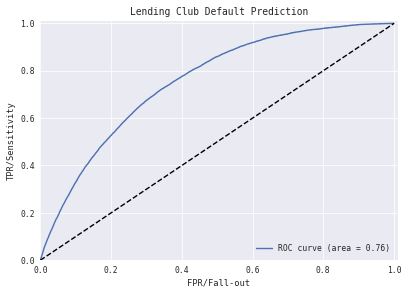

In [106]:
# Draw a picture to show the AUC

p_hat = rfc.predict_proba(tests_X).T[1]
fpr, tpr, thresholds = metrics.roc_curve(tests_y, p_hat)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("Lending Club Default Prediction")
plt.legend(loc = 'lower right')

# Summary

The random forest model works well in this dataset. There is a overfit on the training set.

# Next Step

1. Redo the feature selection. Do some Principla Component Analysis.
2. There are more feature engineering that I have to do.
3. Try logistic regression as well.